<a href="https://colab.research.google.com/github/aidsdarshana/Titanic-Classification-CodeAlpha2024/blob/main/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CodeAlpha Internship:**





Name: DARSHANA P



Student ID: CD/03/45392





Task No: 1


Take Name: Titanic Classification

Batch: 1 october 2024

### **IMPORTING LIBRARIES**

In [ ]:
import numpy as num
import pandas as pan
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### **Data Processing**

In [ ]:
# Using Pandas DataFrame load the data from csv file
dataset=pan.read_csv('/content/final.csv')


In [ ]:
# First 5 Data using Header
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Number of Rows and Column
dataset.shape

(418, 12)

In [ ]:
# Information From Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# Find the Missing Values in Each Column
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


### **Handling the Missing Values**

In [ ]:
# Drop the "Cabin" Column
dataset.drop(columns='Cabin', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [ ]:
# Replace the Missing Values in "Age" by Mean
dataset['Age'].fillna(dataset['Age'].mean())

,Age
0,34.50000
1,47.00000
2,62.00000
3,27.00000
4,22.00000
...,...
413,30.27259
414,39.00000
415,38.50000
416,30.27259


In [ ]:
# Again Repeat this Process for "Fare"

# Fill the missing Fare value with the median fare
dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

<ipython-input-46-2f5ce4fddf20>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)


### **Data Analysis**

In [ ]:
# Statistical Measure of Dataset
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.576535
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.850103
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Find the Number of People Survived or Not
dataset['Survived'].value_counts()

,count
Survived,
0,266
1,152


### **Data Visualization**

In [ ]:
sea.set

<function seaborn.rcmod.set(*args, **kwargs)>

<ipython-input-72-6b2b3c39d71c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(x='Survived', data=dataset, palette=['#3498db', '#e74c3c'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


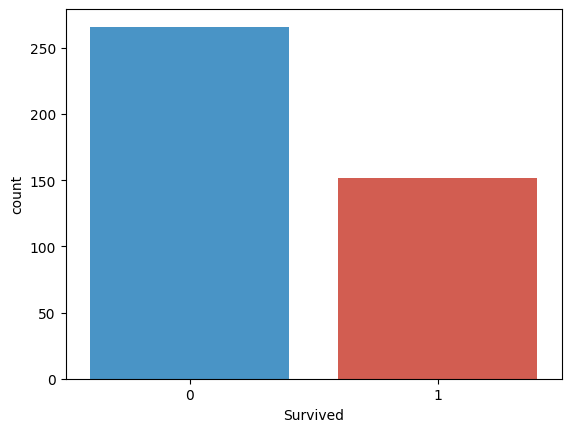

In [ ]:
# Count Plot= "Survived" Column
sea.countplot(x='Survived', data=dataset, palette=['#3498db', '#e74c3c'])
plt.show()

In [ ]:
dataset['Sex'].value_counts()

,count
Sex,
male,266
female,152


<ipython-input-74-8080992130f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sea.countplot(x='Sex', data=dataset, palette=['#e74c3c', '#f39c12'])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


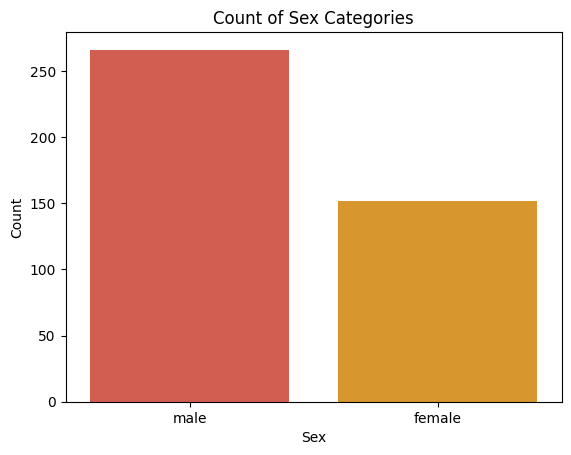

In [ ]:
# Count Plot= "Sex" Column
sea.countplot(x='Sex', data=dataset, palette=['#e74c3c', '#f39c12'])
plt.title('Count of Sex Categories')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Survived', ylabel='Sex'>

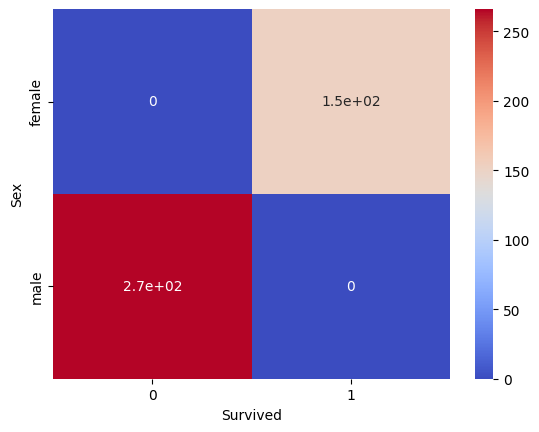

In [ ]:
# Survived--> Sex Wise
heatmap_data = pan.crosstab(dataset['Sex'], dataset['Survived'])
sea.heatmap(heatmap_data, annot=True, cmap="coolwarm", cbar=True)

<Axes: xlabel='Pclass', ylabel='Fare'>

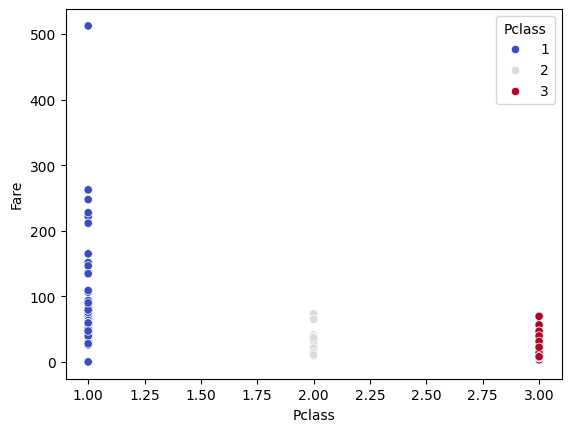

In [ ]:
# Count Plot= "Pclass" Column
sea.scatterplot(data=dataset, x='Pclass', y='Fare', hue='Pclass', palette='coolwarm')

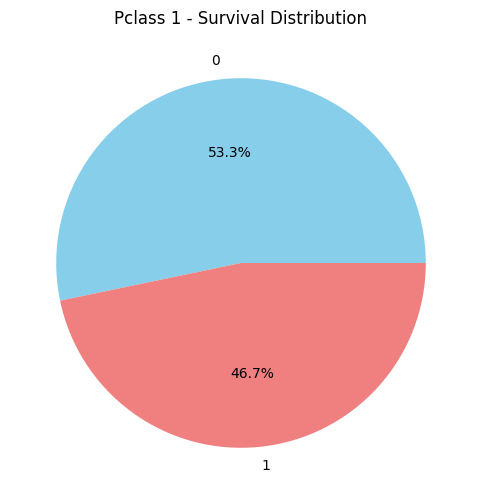

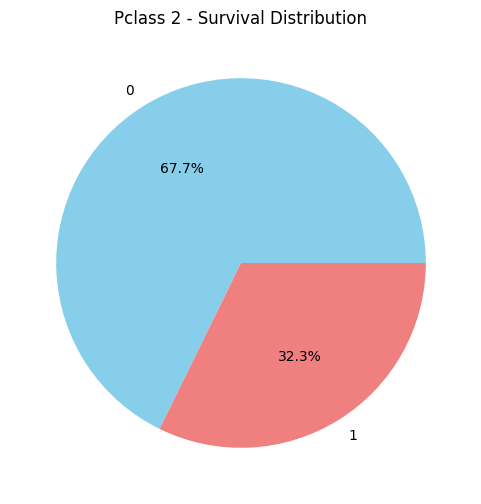

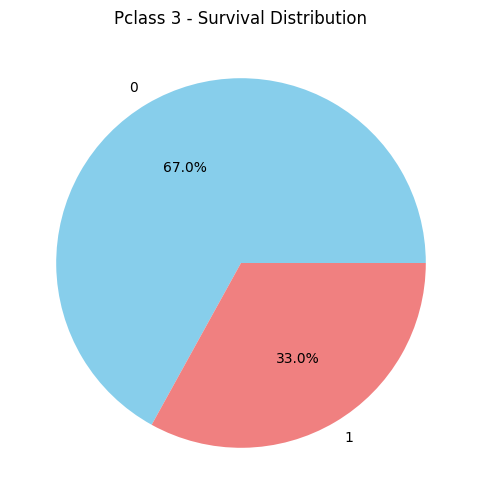

In [ ]:
# Pclass--> Survived Wise
pie_data = pan.crosstab(dataset['Pclass'], dataset['Survived'])
for pclass in pie_data.index:
    plt.figure(figsize=(6, 6))
    plt.pie(pie_data.loc[pclass], labels=pie_data.columns, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.title(f'Pclass {pclass} - Survival Distribution')
    plt.show()

### **Converting Column**

In [ ]:
# converting categorical Columns
dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1})
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


### **Seperating Table**

In [ ]:
x=dataset[['Pclass','Sex']]
y=dataset['Survived']


In [ ]:
print(x)

     Pclass  Sex
0         3    0
1         3    1
2         2    0
3         3    0
4         3    1
..      ...  ...
413       3    0
414       1    1
415       3    0
416       3    0
417       3    0

[418 rows x 2 columns]


In [ ]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


### **Spliting the Data Into Training & Testing Data**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(418, 2) (334, 2) (84, 2)


In [ ]:
print(y.shape, y_train.shape, y_test.shape)

(418,) (334,) (84,)


# **MODEL BUILDING**

### **Logistic Regression**

In [ ]:
model=LogisticRegression(random_state=0)

In [ ]:
# training the Logistic Regression model with training data
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

# **MODEL EVALUATION**

### **Accuracy score**

In [ ]:
# accuracy on training data
x_train_prediction = model.predict(x_train)

In [ ]:
print(x_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [ ]:
training_data = accuracy_score(y_train, x_train_prediction)
print('Accuracy score of training data : ', training_data)

Accuracy score of training data :  1.0


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(x_test)

In [ ]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [ ]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


# **CHATBOT**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
a=int(input("Enter the Passenger Class: "))
b=int(input("Enter the Gender:"))
result=model.predict([[a,b]])
if (result==0):
  print("Unfortunately, you did not survive the Titanic disaster")
else:
  print("Congratulations! You survived the Titanic disaster")

Enter the Passenger Class: 1
Enter the Gender:1
Congratulations! You survived the Titanic disaster
